<!--<div align="center">Семинар № 5-->

<div align="center"><font color=#4682B4 size=5 face=
                          "segoe print"><em><strong>Семинар № 10</strong></em></font></div>

<div class="alert alert-block alert-info"><em>
<b>ЗАДАЧА № 1.</b> Провести дисперсионный анализ для определения того,<br>
есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.<br>
Даны значения роста в трех группах случайно выбранных спортсменов:<br>
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.<br>
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.<br>
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.
</em></div>

In [1]:
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
f_n = np.array([173, 175, 180, 178, 177, 185, 183, 182])
h_n = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
w_n = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

<font size="2px">Для начала проверим выборки на нормальность распределения :<br>
    _**а**._ С помощью **теста Шапиро - Уилка :**

In [5]:
st.shapiro(f_n)

ShapiroResult(statistic=0.9775081872940063, pvalue=0.9495400786399841)

In [6]:
st.shapiro(h_n)

ShapiroResult(statistic=0.957919716835022, pvalue=0.7763141393661499)

In [7]:
st.shapiro(w_n)

ShapiroResult(statistic=0.9386807680130005, pvalue=0.5051150918006897)

 <font size="2px">**$p-value$** для каждой выборки существенно больше **$\alpha = 0.05$**, поэтому 
    принимаем, что данные **распределены нормально**.<br><br>

_**б**_.Построим **QQ – графики** для визуализации нормальности.

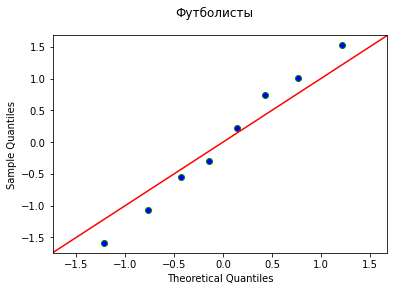

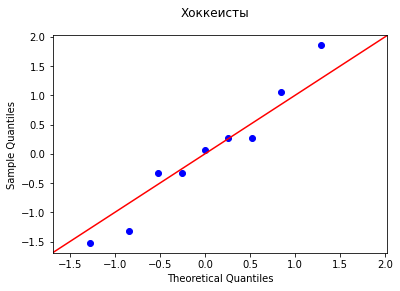

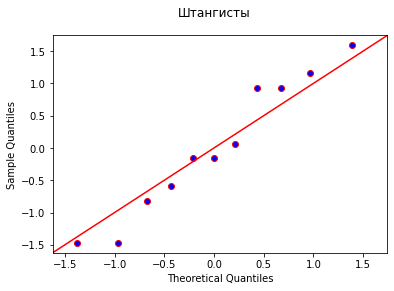

In [11]:
a = sm.qqplot(f_n, c = 'g', fit=True, line='45')
a.suptitle("Футболисты")
b = sm.qqplot(h_n, c = 'b', fit=True, line='45')
b.suptitle("Хоккеисты")
с = sm.qqplot(w_n, c = 'r', fit=True, line='45')
с.suptitle("Штангисты")
plt.show()

<font size="2px">Графики подтверждают результаты **теста Шапиро - Уилка**.<br><br>
 Проверим дисперсии на однородность с помощью **Барлетт-теста**.

In [12]:
st.bartlett(f_n, h_n, w_n)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

<font size="2px">А теперь с помощью **теста Левене**. 

In [15]:
st.levene(f_n, h_n, w_n, center='median')

LeveneResult(statistic=0.0836323510368345, pvalue=0.920025568103872)

In [17]:
st.levene(f_n, h_n, w_n, center='mean')

LeveneResult(statistic=0.11046961071348868, pvalue=0.8958481763722974)

<font size="2px">Во всех случаях **$p-value$** существенно больше **$\alpha = 0.05$**, поэтому 
    принимаем, что дисперсии **однородны**.<br><br>
Проведём однофакторный дисперсионный анализ.<br>
Сформулируем нулевую гипотезу **$H0: \mu_1=\mu_2=\mu_3$** т.е. средний рост спортсмена
    не зависит от вида спорта.
Альтернативная гипотеза **$H1: \mu_1\not=\mu_2\not=\mu_3$** рост спортсменов различается в разных видах спорта.<br><br>
Используем **критерий Фишера**.

In [21]:
print(f'Средний рост футболистов = {f_n.mean():.2f}')
print(f'Средний рост хоккеистов = {h_n.mean():.2f}')
print(f'Средний рост штангистов = {w_n.mean():.2f}')
s_n = np.concatenate([f_n, h_n, w_n])
print(f'Средний рост спортсменов = {s_n.mean():.2f}')

Средний рост футболистов = 179.12
Средний рост хоккеистов = 178.67
Средний рост штангистов = 172.73
Средний рост спортсменов = 176.46


In [24]:
Sf = (f_n.mean() - s_n.mean()) ** 2 * len(f_n)  + (h_n.mean() - s_n.mean()) ** 2 * len(h_n) +\
    (w_n.mean() - s_n.mean()) ** 2 * len(w_n)
Sost = sum((f_n - f_n.mean()) ** 2) + sum((h_n - h_n.mean()) ** 2) + sum((w_n - w_n.mean()) ** 2)
S2 = sum((s_n - s_n.mean()) ** 2)
Sf, Sost, S2

(253.9074675324678, 577.0568181818181, 830.9642857142854)

In [25]:
k = 3 - 1
n = len(f_n) + len(h_n) + len(w_n) - 3
k, n

(2, 25)

In [26]:
print(f"Факторная дисперсия = {Sf / k:.2f}")
print(f"Остаточная дисперсия = {Sost / n:.2f}")
print(f"Наблюдаемый критерий Фишера = {Sf / k / (Sost / n):.10f}")

Факторная дисперсия = 126.95
Остаточная дисперсия = 23.08
Наблюдаемый критерий Фишера = 5.5000534508


In [27]:
f_cr = st.f.ppf(1 - 0.05, k, n)
print(f"Критическое значение = {f_cr:.5f}")

Критическое значение = 3.38519


<font size="2px">Или то же значение по таблицам :

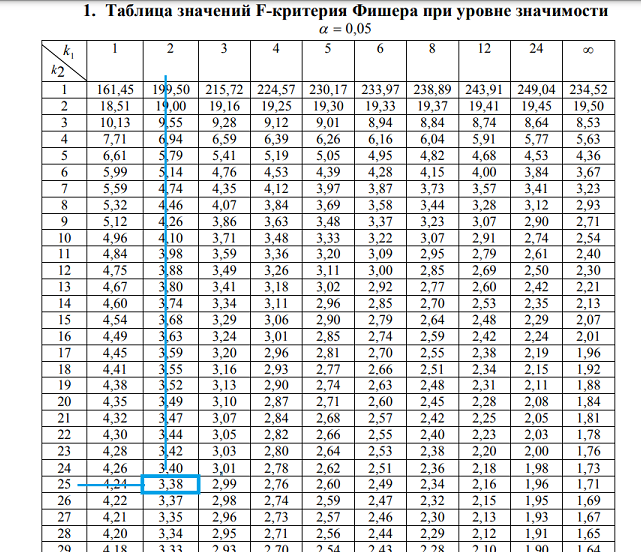

<font size="2px">Так как наблюдаемый критерий Фишера больше критического критерия **$F_{наб}>F_{крит}$**
отвергаем нулевую гипотезу в пользу альтернативной: рост спортсмена **зависит** от вида спорта, которым он занимается.

<font size="2px">Такой же результат получим при помощи функции _**f_oneway()**_ из пакета **SciPy Python**.

In [32]:
st.f_oneway(f_n, h_n, w_n)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

<font size="2px">**$p-value=0,010$** меньше **$\alpha = 0.05$** - **нулевая гипотеза отвергается**.
<br><br>
Построим график :

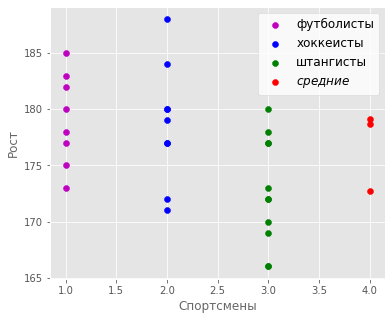

In [50]:
x = np.arange(0, 4, 10)
xf = [1]*8
xh = [2]*9
xw = [3]*11
xm = [4]*3
m = [np.mean(f_n), np.mean(h_n), np.mean(w_n)]

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    plt.xlabel('Спортсмены', c = 'k', alpha=0.6)
    plt.ylabel('Рост', c = 'k', alpha=0.6)
    plt.scatter(xf, f_n, c = 'm', label="футболисты")
    plt.scatter(xh,h_n, c = 'b', label="хоккеисты")
    plt.scatter(xw,w_n, c = 'g', label="штангисты")
    plt.scatter(xm,m, c = 'r', label="$средние$")
    plt.legend(fontsize='large', facecolor='w')

plt.show()

<font size="2px">Заметно, что рост штангистов отличается. Проверим это с помощью
**post hoc теста Тьюки** :

<font size="2px">Создадим массивы одного размера и объединим их.

In [52]:
f_p = np.append(f_n, [np.mean(f_n)] * 3)
f_p, len(f_p)

(array([173.   , 175.   , 180.   , 178.   , 177.   , 185.   , 183.   ,
        182.   , 179.125, 179.125, 179.125]),
 11)

In [53]:
h_p = np.append(h_n, [np.mean(h_n)] * 2)
h_p, len(h_p)

(array([177.        , 179.        , 180.        , 188.        ,
        177.        , 172.        , 171.        , 184.        ,
        180.        , 178.66666667, 178.66666667]),
 11)

In [54]:
s_p = np.append(np.append(f_p, h_p), w_n)

In [58]:
import pandas as pd
df_s = pd.DataFrame({'спорт': np.repeat(['футбол', 'хоккей', 'штанга'], repeats = 11), 'рост': s_p})
df_s.head(13)

,спорт,рост
0,футбол,173.000
1,футбол,175.000
2,футбол,180.000
3,футбол,178.000
4,футбол,177.000
5,футбол,185.000
6,футбол,183.000
7,футбол,182.000
8,футбол,179.125
9,футбол,179.125


In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tuky = pairwise_tukeyhsd(endog = df_s['рост'], groups=df_s['спорт'], alpha= 0.05 )
print(tuky)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
футбол хоккей  -0.4583    0.9  -5.0677   4.151  False
футбол штанга  -6.3977  0.005 -11.0071 -1.7884   True
хоккей штанга  -5.9394 0.0094 -10.5487 -1.3301   True
-----------------------------------------------------


<div class="alert alert-block alert-success"><em>
<b>Ответ:</b><br> Рост спортсменов разных видов спорта отличается за счёт роста штангистов.
</em></div>